# Analyzing Bestselling Books on Amazon 

The dataset contains top 50 best selling books of each year from 2009 to 2019. As it is data of 10 years and 50 books from each year, we have 550 books in the dataset. Please note that the books are not unique.

Few questions to ask:

   1. Which book and the author had the most number of reviews for each year?
   2. Each year, which books and author had the highest user ratings?
   3. Are there books which appear on the top 50 list for more than one year?
   4. In each year, fiction/nonfiction books are highest?
   5. Are there any correlations between reviews, User Rating, and Price?
   6. What are the average user ratings, average prices, and average number of reviews for each year?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'lightsteelblue'})
#plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'white', 'ytick.color':'white', 'figure.facecolor':'white'})

In [2]:
df = pd.read_csv('bestsellers with categories.csv')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
df.shape

(550, 7)

The dataset has 550 books and 7 columns. 

In [4]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


We can see that there are books with zero price. This is odd but it seems Amazon is offereing some free books as well. If you find a book you like, if it says 'read for free', then you can click on it will be available on any device to read. The prices ranges from \\$0 to \\$105 with an average book price of \\$13.10 and median of \\$11. With mean being greater than median, we can expect a slightly positively skewed(right-skewed) price distribution.

Average number of reviews is 11953.28 and median is 8580. We can expect a positively skewed distribution here as well. Number of reviews ranges from 37 to 87841 which is a high range.

On the other hand, user ratings ranges from 3.3 to 4.9, which is small. And the mean is 4.6 with standard deviation of 0.22. Also note that median is 4.7 and very close to the value of mean. We can expect a negatively skewed distribution with a low range. 

In [5]:
free_books = df[df['Price']==0]
free_books.sort_values('Year')

,Name,Author,User Rating,Reviews,Price,Year,Genre
461,The Short Second Life of Bree Tanner: An Eclip...,Stephenie Meyer,4.6,2122,0,2010,Fiction
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
505,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2013,Fiction
116,Frozen (Little Golden Book),RH Disney,4.7,3642,0,2014,Fiction
193,JOURNEY TO THE ICE P,RH Disney,4.6,978,0,2014,Fiction
219,Little Blue Truck,Alice Schertle,4.9,1884,0,2014,Fiction
506,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2014,Fiction
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
358,The Constitution of the United States,Delegates of the Constitutional,4.8,2774,0,2016,Non Fiction


These are the books Amazon gave away for a zero price. Most of them are fictions and the interesting thing they have had good User Ratings. One could be curious why Amazon was so generous with these books. It could be for marketing purposes. The book called 'To kill a Mockingbird' by the author 'Harper Lee' has been free during the years 2013, 2014, 2015, and 2016. Another interesting thing is that eventhough this book has been in the top 50 list for four consecutive years, its' ratings or the number of reviews hasn't changed during those years. This seem odd.

In [6]:
df_new = df.describe(include = 'O')
df_new.style.set_properties(subset=['Name'], **{'width': '300px'})

,Name,Author,Genre
count,550,550,550
unique,351,248,2
top,"Publication Manual of the American Psychological Association, 6th Edition",Jeff Kinney,Non Fiction
freq,10,12,310


There are 351 unique books in the list and the book "Publication Manual of the American Psychological Association, 6th Edition" is the most appeared book with the frequeny of 10.

The Author "Jeff Kinney" is the most appeared author among 248 unique authors. This author is present 12 times in this dataset. Let's look at what books he has written in this list.

In [7]:
df[df['Name']=='Publication Manual of the American Psychological Association, 6th Edition']

,Name,Author,User Rating,Reviews,Price,Year,Genre
271,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2009,Non Fiction
272,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2010,Non Fiction
273,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2011,Non Fiction
274,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2012,Non Fiction
275,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2013,Non Fiction
276,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2014,Non Fiction
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction
278,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2016,Non Fiction
279,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2017,Non Fiction
280,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2018,Non Fiction


In [8]:
df[df['Author']=="Jeff Kinney"].sort_values('Year')

,Name,Author,User Rating,Reviews,Price,Year,Genre
72,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15,2009,Fiction
80,"Dog Days (Diary of a Wimpy Kid, Book 4) (Volum...",Jeff Kinney,4.8,3181,12,2009,Fiction
474,"The Ugly Truth (Diary of a Wimpy Kid, Book 5)",Jeff Kinney,4.8,3796,12,2010,Fiction
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
468,"The Third Wheel (Diary of a Wimpy Kid, Book 7)",Jeff Kinney,4.7,6377,7,2012,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
73,Diary of a Wimpy Kid: The Long Haul,Jeff Kinney,4.8,6540,22,2014,Fiction
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction
88,Double Down (Diary of a Wimpy Kid #11),Jeff Kinney,4.8,5118,20,2016,Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction


Aha! Not a surprise at all! He is the author of 'Diary of a Wimpy Kid' series, which is very popular mostly among school children. The Long Haul is the 9th book of the series and was originally published in 2014. The Getaway is the 12th book of the series, originally publised in 2017. I checked couple of more books here and noticed that their published years perfectly match with the year in this dataset. It is fascinating to see how popular these books has been. Most of them have a User Rating of 4.8. Only two of them have fallen outside with the ratings of 4.7 and 4.9.

In [9]:
print(df.dtypes)

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object


In [10]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

There are no missing values in the dataset.

In [11]:
#df.groupby('Year')[['Name']].count()
df.duplicated().sum()

0

There are no duplicate rows in the dataset.

In [12]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

## Explore Reviews 

In [13]:
grouped_by_year = df.groupby('Year')
avg_reviews = grouped_by_year['Reviews'].mean()
avg_reviews = avg_reviews.reset_index()

In [14]:
avg_reviews['Reviews']

0      4710.12
1      5479.62
2      8100.82
3     13090.92
4     13098.14
5     15859.94
6     14233.38
7     14196.00
8     12888.40
9     13930.42
10    15898.34
Name: Reviews, dtype: float64

In [15]:
idx = df.groupby(['Year'])['Reviews'].transform(max) == df['Reviews']
df1 = df[idx].sort_values(by=['Year'])
df1

,Name,Author,User Rating,Reviews,Price,Year,Genre
459,The Shack: Where Tragedy Confronts Eternity,William P. Young,4.6,19720,8,2009,Fiction
407,The Hunger Games,Suzanne Collins,4.7,32122,14,2010,Fiction
408,The Hunger Games (Book 1),Suzanne Collins,4.7,32122,8,2011,Fiction
135,Gone Girl,Gillian Flynn,4.0,57271,10,2012,Fiction
136,Gone Girl,Gillian Flynn,4.0,57271,10,2013,Fiction
137,Gone Girl,Gillian Flynn,4.0,57271,9,2014,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,2016,Fiction
399,The Handmaid's Tale,Margaret Atwood,4.3,29442,7,2017,Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction


The book "Gone Girl" by Gillian Flynn has had highest number of reviews for three consecutive years(2012, 2013, and 2014) while "The girl on the Train" by Paula Hawkins has obtained highest number of reviews for two consecutive years(2015 and 2016). One interesting thing is that the only nonfiction book in this list is the book called "Becoming" by Michelle Obama which is among the two books with User Rating of 4.8. It has been in the top list in 2018 and has the second highest number of reviews over the years. The book "Where the Crawdads Sing" has had the highest number of reviews in 2019 with rating of 4.8.

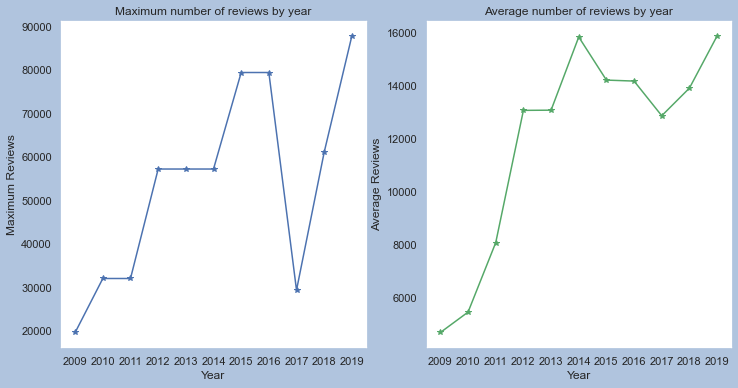

In [16]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.plot(df1['Year'], df1['Reviews'], color = 'b', marker = '*', linestyle = '-')
plt.xticks(np.arange(min(df1['Year']), max(df['Year'])+1, 1.0))
plt.xlabel('Year')
plt.ylabel('Maximum Reviews')
plt.title('Maximum number of reviews by year')

plt.subplot(1,2,2)
plt.plot(avg_reviews['Year'], avg_reviews['Reviews'], color = 'g', marker = '*', linestyle = '-')
plt.xticks(np.arange(min(df1['Year']), max(df['Year'])+1, 1.0))
plt.xlabel('Year')
plt.ylabel('Average Reviews')
plt.title('Average number of reviews by year')

plt.show()

Maximum number of reviews has been incresing or constant over the years 2009 to 2016, but in 2017 it has gone done considerably. However, in 2019, it has gone up and beyond of all the values. If we consider the average number of reviews, it has been increasing until 2014 and then declined until 2017, and then again have gone up in 2018 and more in 2019.

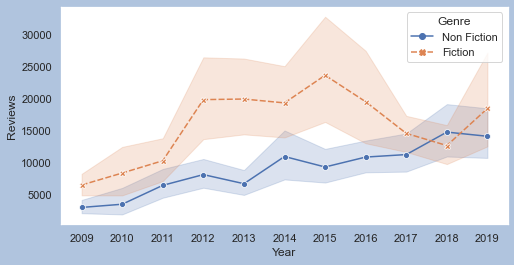

In [17]:
plt.figure(figsize = (8,4))
sns.lineplot(data=df, x="Year", y="Reviews", hue="Genre", markers=True, style= "Genre")
plt.xticks(np.arange(min(df['Year']), max(df['Year'])+1, 1.0))
plt.show()

Average number of reviews of non fiction books have been higher in each year except in 2018. Also, compared to the ranges of fiction, range of reviews of non fiction books have been higher especially in 2012, 2013, 2014, 2015, and 2016.

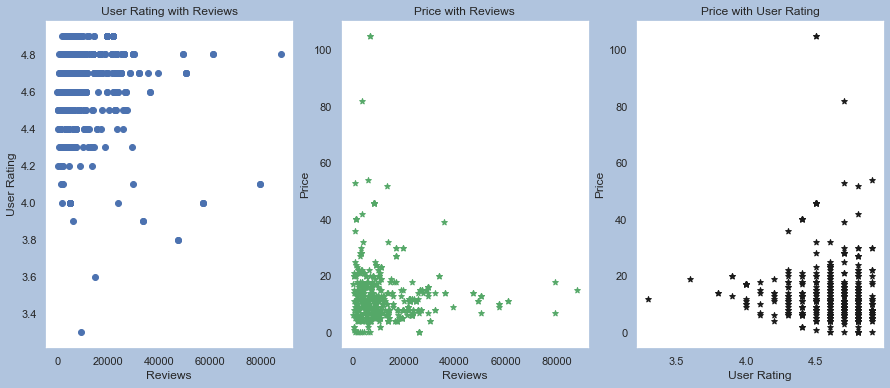

In [18]:
plt.figure(figsize = (15,6))
plt.subplot(1,3,1)
plt.scatter(df['Reviews'], df['User Rating'], marker = 'o')
plt.xlabel('Reviews')
plt.ylabel('User Rating')
plt.title('User Rating with Reviews')

plt.subplot(1,3,2)
plt.scatter(df['Reviews'], df['Price'], color = 'g',marker = '*')
plt.xlabel('Reviews')
plt.ylabel('Price')
plt.title('Price with Reviews')

plt.subplot(1,3,3)
plt.scatter(df['User Rating'], df['Price'], color = 'k',marker = '*')
plt.xlabel('User Rating')
plt.ylabel('Price')
plt.title('Price with User Rating')
plt.show()

There doesn't seem to be correlations between User Rating, Price, and Reviews. However, few interesting things are visible.
 - Books with high user rating have reviews between 0 and 40000.
 - Most books has its price between 0 and 30 and their reviews between 0 and 40000.
 - Most of the books in the dataset has prices between 0 and 30.

In [19]:
df.sort_values('Reviews').tail()

,Name,Author,User Rating,Reviews,Price,Year,Genre
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,2016,Fiction
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


The book 'Where the Crawdads Sing' by Delia Owens has the highest number of reviews with a user rating of 4.8.

## Explore User Rating 

In [20]:
df.sort_values('User Rating').tail()

,Name,Author,User Rating,Reviews,Price,Year,Genre
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019,Fiction
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2017,Fiction
247,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2014,Fiction
146,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,4.9,7038,7,2012,Fiction
249,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2016,Fiction


There are 52 books with the highest user rating of 4.9

In [21]:
df[df['User Rating']==4.9].shape

(52, 7)

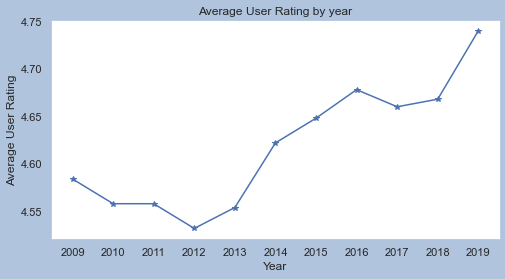

In [22]:
df2 = df.groupby('Year')['User Rating'].mean().reset_index()
plt.figure(figsize = (8,4))
plt.plot(df2['Year'], df2['User Rating'], color = 'b', marker = '*', linestyle = '-')
plt.xticks(np.arange(min(df1['Year']), max(df['Year'])+1, 1.0))
plt.xlabel('Year')
plt.ylabel('Average User Rating')
plt.title('Average User Rating by year')
plt.show()

Average User Rating has decling until the year 2012 and after that it has been increasing over the years.

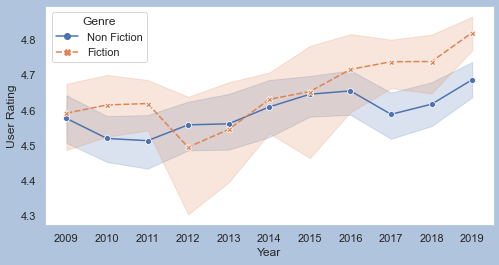

In [23]:
plt.figure(figsize = (8,4))
sns.lineplot(data=df, x="Year", y="User Rating", hue="Genre", markers=True, style= "Genre")
plt.xticks(np.arange(min(df['Year']), max(df['Year'])+1, 1.0))
plt.show()

Average User Rating for fictions and non fictions have been close in 2009, but then average for fiction has been increasing while the average for non fiction books has been decreasing. In 2012, average user rating for fictions has gone below non fiction with a high range of user ratings. Since after 2014 Ratings for fiction has been increasing on top of non fiction books.

## Explore Price

In [24]:
df.groupby('Name').mean().sort_values('Price').tail()

,User Rating,Reviews,Price,Year
Name,,,,
Harry Potter Paperback Box Set (Books 1-7),4.8,13471.0,52.0,2016.0
The Book of Basketball: The NBA According to The Sports Guy,4.7,858.0,53.0,2009.0
Hamilton: The Revolution,4.9,5867.0,54.0,2016.0
The Twilight Saga Collection,4.7,3801.0,82.0,2009.0
"Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5",4.5,6679.0,105.0,2013.5


These are the books with top five prices in the list.

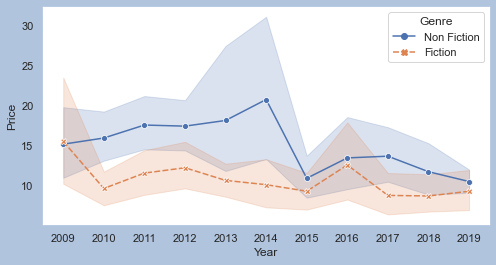

In [25]:
plt.figure(figsize = (8,4))
sns.lineplot(data=df, x="Year", y="Price", hue="Genre", markers=True, style= "Genre")
plt.xticks(np.arange(min(df['Year']), max(df['Year'])+1, 1.0))
plt.show()

Average price of Nonfiction book is higher than a fiction for all those years.

## Explore Name

In [26]:
df['Name'].value_counts().head()

Publication Manual of the American Psychological Association, 6th Edition       10
StrengthsFinder 2.0                                                              9
Oh, the Places You'll Go!                                                        8
The Very Hungry Caterpillar                                                      7
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change     7
Name: Name, dtype: int64

These are the top 5 most appearing books on the dataset.

In [27]:
df[df['Name'] == 'Publication Manual of the American Psychological Association, 6th Edition']

,Name,Author,User Rating,Reviews,Price,Year,Genre
271,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2009,Non Fiction
272,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2010,Non Fiction
273,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2011,Non Fiction
274,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2012,Non Fiction
275,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2013,Non Fiction
276,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2014,Non Fiction
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction
278,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2016,Non Fiction
279,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2017,Non Fiction
280,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2018,Non Fiction


In [28]:
df[df['Name'] == 'StrengthsFinder 2.0']

,Name,Author,User Rating,Reviews,Price,Year,Genre
304,StrengthsFinder 2.0,Gallup,4.0,5069,17,2009,Non Fiction
305,StrengthsFinder 2.0,Gallup,4.0,5069,17,2010,Non Fiction
306,StrengthsFinder 2.0,Gallup,4.0,5069,17,2011,Non Fiction
307,StrengthsFinder 2.0,Gallup,4.0,5069,17,2012,Non Fiction
308,StrengthsFinder 2.0,Gallup,4.0,5069,17,2013,Non Fiction
309,StrengthsFinder 2.0,Gallup,4.0,5069,17,2014,Non Fiction
310,StrengthsFinder 2.0,Gallup,4.0,5069,17,2015,Non Fiction
311,StrengthsFinder 2.0,Gallup,4.0,5069,17,2016,Non Fiction
312,StrengthsFinder 2.0,Gallup,4.0,5069,17,2017,Non Fiction


In [29]:
df[df['Name']=="Oh, the Places You'll Go!"]

,Name,Author,User Rating,Reviews,Price,Year,Genre
245,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2012,Fiction
246,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2013,Fiction
247,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2014,Fiction
248,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2015,Fiction
249,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2016,Fiction
250,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2017,Fiction
251,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2018,Fiction
252,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2019,Fiction


# Explore Author

In [30]:
df['Author'].value_counts().head()

Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
Name: Author, dtype: int64

Here is the top 5 authors appearing most in the dataset.

## Explore Genre

In [31]:
df['Genre'].value_counts(1)

Non Fiction    0.563636
Fiction        0.436364
Name: Genre, dtype: float64

56% of the books in the dataset are non fictions and 44% of them are fictions.

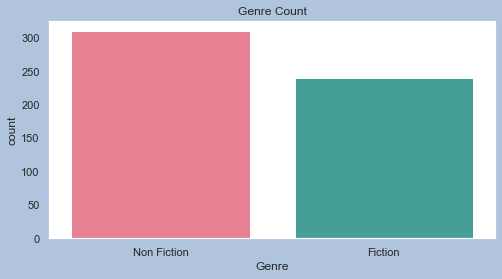

In [32]:
plt.figure(figsize = (8,4))

g = sns.countplot(data=df, x="Genre", palette = 'husl')

plt.title('Genre Count')
plt.show()

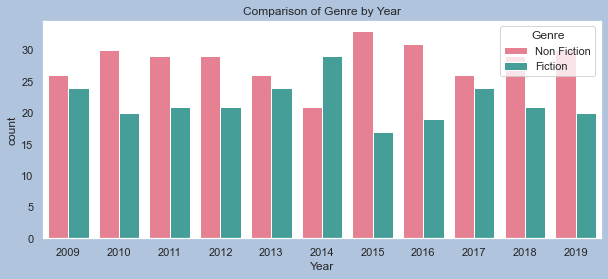

In [33]:
plt.figure(figsize = (10,4))

g = sns.countplot(data=df, x="Year", hue="Genre", palette = 'husl')

plt.title('Comparison of Genre by Year')
plt.show()

Count of non fiction books is higher in each year except in 2014. The gap has been smaller in years 2009, 2013, and 2017.

In [34]:
df.groupby('Genre').mean()

,User Rating,Reviews,Price,Year
Genre,,,,
Fiction,4.648333,15683.791667,10.850000,2013.925000
Non Fiction,4.595161,9065.145161,14.841935,2014.058065


Average user rating and reviews is high for fiction but average price is lower than that of a non fiction.

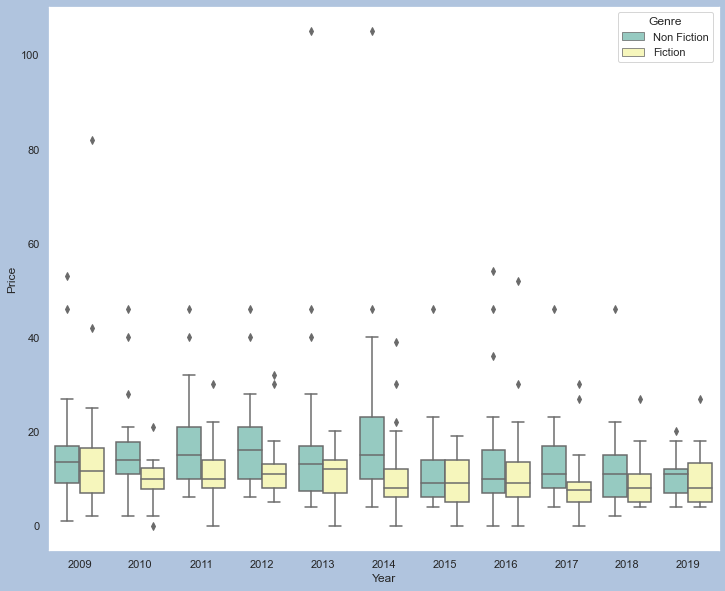

In [35]:
plt.figure(figsize = (12,10))
ax = sns.boxplot(x= 'Year', y="Price", hue ='Genre', data=df, palette="Set3")

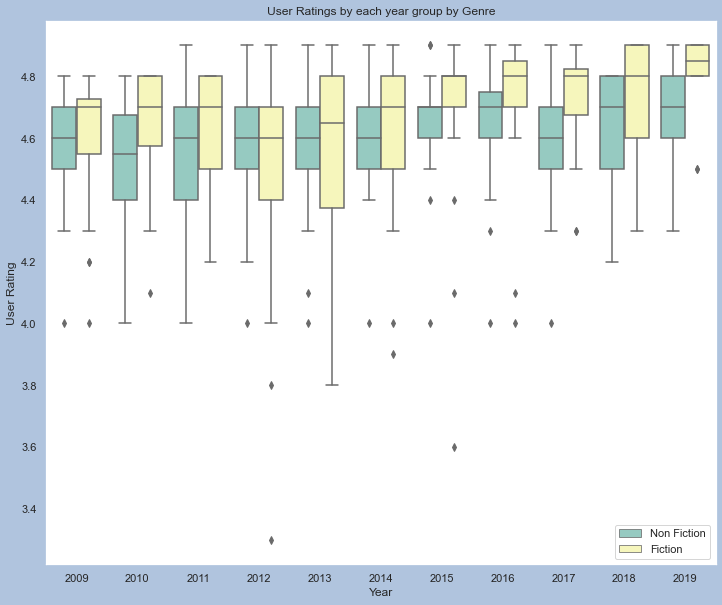

In [36]:
plt.figure(figsize = (12,10))
ax = sns.boxplot(x="Year", y="User Rating", hue="Genre", data=df, palette="Set3")
plt.legend(loc='lower right')
plt.title('User Ratings by each year group by Genre')
plt.show()

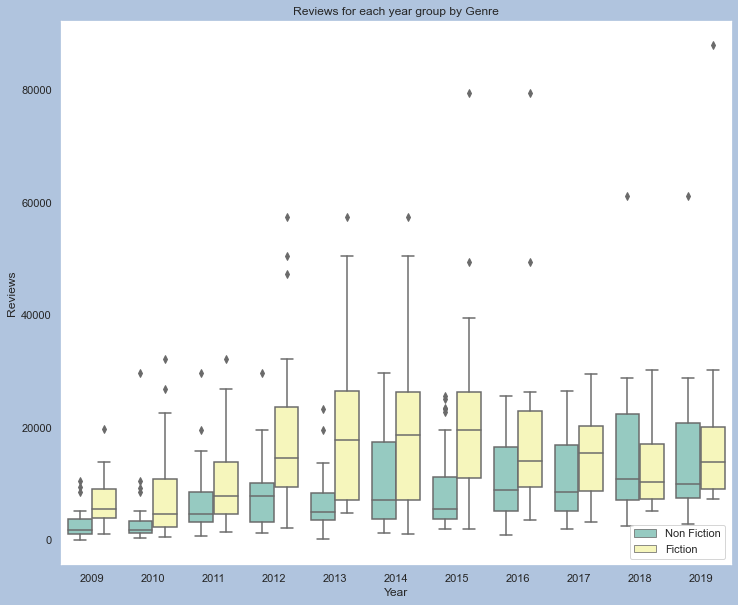

In [37]:
plt.figure(figsize = (12,10))
ax = sns.boxplot(x="Year", y="Reviews", hue="Genre", data=df, palette="Set3")
plt.legend(loc='lower right')
plt.title('Reviews for each year group by Genre')
plt.show()

In [38]:
df_numerical = df[['User Rating', 'Reviews', 'Price', 'Genre']]

<Figure size 1080x720 with 0 Axes>

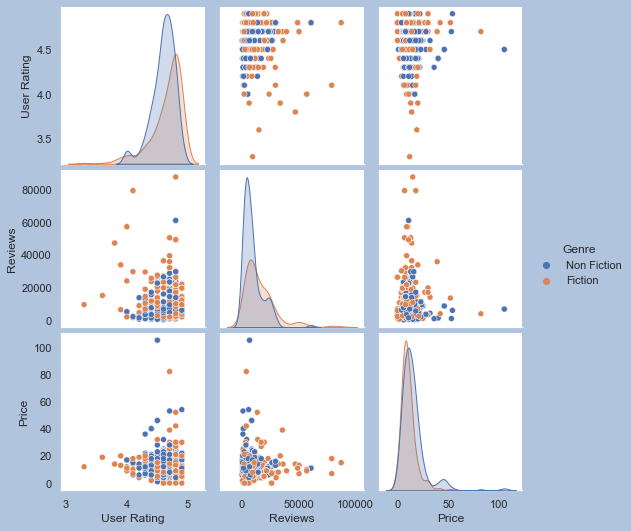

In [39]:
plt.figure(figsize = (15,10))
sns.pairplot(df_numerical, hue = 'Genre')
plt.show()

Distributions with reviews and price are right skewed while the user rating distriburion is left skewed.

### Key Observations 

  - Number of Non fictions are high in total. And it has been high in individual years as well except in the year 2014.
  - Majority of the books are low in price, low in number of reviews, but have higher user ratings.
  - 2014 has been an interesing year. why?
      - 33% (4 out of 12) of free books were given in 2014
      - Has a peak in average number of reviews in 2014
      - Has the highest differences in average prices between fictions and nonfictions.
      - Count of fiction books are higher than non fictions only in 2014.
  - Amazon has offered free books over the years 2009 to 2019.
  - The Author Jeff Kinney has been in the top 50 list for all year from 2009 to 2019. He is the author of diary of a wimpy kid book series. All his books has been in the list in the year they got published.

Average price of a non fiction book is higher than average price of fiction book. We can use hypothesis testing check if it is statistically significant.